In [600]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


#### Dataset  talleres

**fechaope**: Fechaque d ela operación    
**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo   

Cargamos los datasets

In [601]:
#df = pd.read_csv (r'C:\\Users\Practicas\Documents\Prediccion talleres\data\taller_operaciones.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\taller_operaciones.csv',sep=';')
df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\taller_PowerBI.csv',sep=',')
#buses= pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\Fichas_buses.csv',sep=',')
df

,fechaope,nomopera,nomempresa,taller_prove,v_codigbus,ndias_ant,v_edad,capacidad,marca,tipo,subtipo,potencia
0,2018-05-08 00:00:00,Baterias,Cave Talleres,NaN,H107,26,8,8,MERCEDES BENZ,Discrecional,Microbus,120
1,2018-09-15 00:00:00,Fallo en EDC,Cave Talleres,NaN,H107,8,8,8,MERCEDES BENZ,Discrecional,Microbus,120
2,2018-09-23 00:00:00,Fallo en EDC,Cave Talleres,NaN,H107,2,8,8,MERCEDES BENZ,Discrecional,Microbus,120
3,2018-10-06 00:00:00,Fallo en EDC,Cave Talleres,NaN,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
4,2018-10-06 00:00:00,Intercooler,Cave Talleres,NaN,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
...,...,...,...,...,...,...,...,...,...,...,...,...
6572,2021-07-31 00:00:00,Reparar pinchazo,Cave Talleres,NaN,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6573,2021-08-10 00:00:00,Baterias,Cave Talleres,NaN,H126,6,19,105,IVECO/FIAT,Urbano,Normal,196
6574,2021-08-12 00:00:00,Fuelles 2º eje,Cave Talleres,NaN,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6575,2020-03-13 00:00:00,Reparar pinchazo,Cave Talleres,NaN,F212,7,3,163,DAF,Urbano,Articulado,271


In [602]:
df.columns


Index(['fechaope', 'nomopera', 'nomempresa', 'taller_prove', 'v_codigbus',
       'ndias_ant', 'v_edad', 'capacidad', 'marca', 'tipo', 'subtipo',
       'potencia'],
      dtype='object')

eliminamos taller_prove,y nomempresa s eha consultado y solo Cave talleres realiza las reparaciones
eliminamos fechaope porque nos  eva a utilizar.


In [603]:
df = df.drop('taller_prove', 1)
df = df.drop('nomempresa', 1)
df = df.drop('fechaope', 1)
df

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3658638994.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('taller_prove', 1)


,nomopera,v_codigbus,ndias_ant,v_edad,capacidad,marca,tipo,subtipo,potencia
0,Baterias,H107,26,8,8,MERCEDES BENZ,Discrecional,Microbus,120
1,Fallo en EDC,H107,8,8,8,MERCEDES BENZ,Discrecional,Microbus,120
2,Fallo en EDC,H107,2,8,8,MERCEDES BENZ,Discrecional,Microbus,120
3,Fallo en EDC,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
4,Intercooler,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
...,...,...,...,...,...,...,...,...,...
6572,Reparar pinchazo,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6573,Baterias,H126,6,19,105,IVECO/FIAT,Urbano,Normal,196
6574,Fuelles 2º eje,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6575,Reparar pinchazo,F212,7,3,163,DAF,Urbano,Articulado,271


Se comprueban los tipos de datos que tenemos en el dataset y si hay missings

In [604]:
df.dtypes

nomopera      object
v_codigbus    object
ndias_ant      int64
v_edad         int64
capacidad      int64
marca         object
tipo          object
subtipo       object
potencia       int64
dtype: object

In [605]:
round(df.isna().sum() * 100 / len(df),2)

nomopera      0.0
v_codigbus    0.0
ndias_ant     0.0
v_edad        0.0
capacidad     0.0
marca         0.0
tipo          0.0
subtipo       0.0
potencia      0.0
dtype: float64

comprobamos  la coherencia de los valores de ndias_ant, se eliminaran los valores negativos 0 y superiores a 150, 

In [606]:
#df['aliasemp'] = np.where( (df['aliasemp'].value_counts()<100),'Sin asignar',df['aliasemp'])

In [607]:
df['ndias_ant'].describe()

count    6577.000000
mean       28.757944
std       210.502936
min      -100.000000
25%         4.000000
50%         9.000000
75%        21.000000
max      6873.000000
Name: ndias_ant, dtype: float64

In [608]:

df_drop=df[df['ndias_ant']>150].index
df=df.drop(df_drop)
df_drop=df[df['ndias_ant']<=0].index
df=df.drop(df_drop)
df=df.reset_index(drop = True)
df

,nomopera,v_codigbus,ndias_ant,v_edad,capacidad,marca,tipo,subtipo,potencia
0,Baterias,H107,26,8,8,MERCEDES BENZ,Discrecional,Microbus,120
1,Fallo en EDC,H107,8,8,8,MERCEDES BENZ,Discrecional,Microbus,120
2,Fallo en EDC,H107,2,8,8,MERCEDES BENZ,Discrecional,Microbus,120
3,Fallo en EDC,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
4,Intercooler,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120
...,...,...,...,...,...,...,...,...,...
6459,Reparar pinchazo,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6460,Baterias,H126,6,19,105,IVECO/FIAT,Urbano,Normal,196
6461,Fuelles 2º eje,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196
6462,Reparar pinchazo,F212,7,3,163,DAF,Urbano,Articulado,271


debido a que la variable a predecir tiene muchas opciones se ha decidido agrupar las operaciones de la misma indole, para poder hacer una predicción mas fiable, reduciendo así la cantidad de variables a predecir.


# AGRUPAMOS

## SISTEMA DE REFRIGERACIÓN

In [609]:
df['grupopera'] = np.where(
                        (df['nomopera'].str.contains('Bomba agua'))|
                        (df['nomopera'].str.contains('Intercooler'))|
                        (df['nomopera'].str.contains('Manguito/s calefaccion'))|
                        (df['nomopera'].str.contains('Manguito/s motor'))|
                        (df['nomopera'].str.contains('Radiador'))|  
                        (df['nomopera'].str.contains('Termostatos'))| 
                        (df['nomopera'].str.contains('Fuga refrigerante'))| 
                        (df['nomopera'].str.contains('Presion en circuito refrigeracion'))
                         ,'Sistema refrigeración',np.nan)

## SISTEMA DE DIRECION

In [610]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Caja direccion'))|
                           (df['nomopera'].str.contains('Fuga aceite servodireccion'))|
                           (df['nomopera'].str.contains('Rotulas direccion'))|
                           (df['nomopera'].str.contains('Alineado de direccion'))|
                           (df['nomopera'].str.contains('Timoneria direccion'))
                           ,'Sistema dirección',df['grupopera'])

## SISTEMA FRENOS

In [611]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Frenos 1º eje'))|
                           (df['nomopera'].str.contains('Frenos 2º eje'))|
                           (df['nomopera'].str.contains('Frenos 3º eje'))|
                           (df['nomopera'].str.contains('Freno mano'))|
                           (df['nomopera'].str.contains('Disco'))|# disco de embrague a parte separar
                           (df['nomopera'].str.contains('Bomba freno'))
                           ,'Sistema frenos',df['grupopera'])

## SISTEMA DE ESCAPE

In [612]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Flexible escape'))|
                           (df['nomopera'].str.contains('Fuga escape'))|
                           (df['nomopera'].str.contains('Catalizador'))|
                           (df['nomopera'].str.contains('Silencioso'))
                           ,'Sistema de escape',df['grupopera'])

## SISTEMA AMORTIGUACIÓN

In [613]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Regular suspension'))|
                           (df['nomopera'].str.contains('Amortiguador 2º eje derecho'))|
                           (df['nomopera'].str.contains('Amortiguadores 2º eje'))|
                           (df['nomopera'].str.contains('Amortiguadores 3º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 1º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 2º eje'))
                           ,'Sistema de amortiguación',df['grupopera'])

## SISTEMA DE ALIMENTACIÓN

In [614]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Inyectores'))|
                           (df['nomopera'].str.contains('Reglaje inyectores'))
                           ,'Sistema de alimentación',df['grupopera'])

## MOTOR

In [615]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Cambiar turbina/motor condensadora'))|
                           (df['nomopera'].str.contains('Culata del compresor del motor'))|
                           (df['nomopera'].str.contains('Fuga aceite motor'))|
                           (df['nomopera'].str.contains('Limpiar motor'))|
                           (df['nomopera'].str.contains('Motor'))|
                           (df['nomopera'].str.contains('Poleas motor'))|
                           (df['nomopera'].str.contains('Reten trasero motor'))|
                           (df['nomopera'].str.contains('Ruido en motor'))|
                           (df['nomopera'].str.contains('Arbol de levas'))|
                           (df['nomopera'].str.contains('Casquillos de biela'))|
                           (df['nomopera'].str.contains('Potencia motor'))|
                           (df['nomopera'].str.contains('Turbo'))|
                           (df['nomopera'].str.contains('Manguito/s admision'))|
                           (df['nomopera'].str.contains('Tacos motor'))
                           ,'Motor',df['grupopera'])

## Precalentador

In [616]:
df['grupopera'] = np.where((df['nomopera'].str.contains('recalentador'))
                           ,'Precalentador',df['grupopera'])

## Alternador

In [617]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Alternador'))|
                           #(df['nomopera'].str.contains('Soporte alternador'))|
                           (df['nomopera'].str.contains('Alternador auxiliar'))
                           ,'Alternador',df['grupopera'])

## ABS/EBS

In [618]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo en ABS/EBS'))
                           ,'ABS/EBS',df['grupopera'])

## ADBLUE

In [619]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo adblue'))|
                           (df['nomopera'].str.contains('Fuga adblue'))
                           ,'Adblue',df['grupopera'])

## BATERIAS

In [620]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Baterias'))|
                           (df['nomopera'].str.contains('Carga de baterias'))
                           ,'Baterias',df['grupopera'])

## CORREAS

In [621]:
df['grupopera'] = np.where((df['nomopera'].str.contains('orrea'))
                           ,'Correas',df['grupopera'])

## Reglaje de Válvulas

In [622]:
df['grupopera'] = np.where((df['nomopera'].str.contains('valvula'))
                           ,'Reglaje válvulas',df['grupopera'])

## Filtro Particulas

In [623]:
df['grupopera'] = np.where((df['nomopera'].str.contains('iltro part'))
                           ,'Filtro de Particulas',df['grupopera'])

## EDC

In [624]:
df['grupopera'] = np.where((df['nomopera'].str.contains('EDC'))
                           ,'Fallo en EDC',df['grupopera'])

## Fuga de Aire

In [625]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuga de aire'))
                           ,'Fuga de aire',df['grupopera'])

## TURBINA MOTOR

In [626]:
df['grupopera'] = np.where((df['nomopera'].str.contains('turbina'))
                           ,'Cambiar turbina/motor condensadora',df['grupopera'])

## GASOIL

In [627]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Deposito de gasoil'))|
                           #(df['nomopera'].str.contains('Cambio filtro gasoil'))|
                           (df['nomopera'].str.contains('Fuga gasoil'))
                           ,'Gasoil',df['grupopera'])

## Fallo en AVS

In [628]:
df['grupopera'] = np.where((df['nomopera'].str.contains('AVS'))
                           ,'Fallo en AVS',df['grupopera'])

## Fuelle

In [629]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuelle 1º eje derecho'))|
                           (df['nomopera'].str.contains('Fuelle 1º eje izquierdo'))|
                           (df['nomopera'].str.contains('Fuelles 2º eje'))|
                           (df['nomopera'].str.contains('Fuelles1º eje'))
                           ,'Fuelle',df['grupopera'])

## Pinchazo

In [630]:
df['grupopera'] = np.where((df['nomopera'].str.contains('pinchazo'))
                           ,'Pinchazo',df['grupopera'])

#### Eliminación de  operaciones no agrupadas

In [631]:
df=df[~df['grupopera'].str.contains("nan")]
df.groupby(['grupopera']).count()

,nomopera,v_codigbus,ndias_ant,v_edad,capacidad,marca,tipo,subtipo,potencia
grupopera,,,,,,,,,
ABS/EBS,87,87,87,87,87,87,87,87,87
Adblue,94,94,94,94,94,94,94,94,94
Alternador,261,261,261,261,261,261,261,261,261
Baterias,320,320,320,320,320,320,320,320,320
Cambiar turbina/motor condensadora,195,195,195,195,195,195,195,195,195
Correas,782,782,782,782,782,782,782,782,782
Fallo en AVS,89,89,89,89,89,89,89,89,89
Fallo en EDC,405,405,405,405,405,405,405,405,405
Filtro de Particulas,140,140,140,140,140,140,140,140,140


In [632]:
df = df.drop('nomopera', 1)
df

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/1326373127.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('nomopera', 1)


,v_codigbus,ndias_ant,v_edad,capacidad,marca,tipo,subtipo,potencia,grupopera
0,H107,26,8,8,MERCEDES BENZ,Discrecional,Microbus,120,Baterias
1,H107,8,8,8,MERCEDES BENZ,Discrecional,Microbus,120,Fallo en EDC
2,H107,2,8,8,MERCEDES BENZ,Discrecional,Microbus,120,Fallo en EDC
3,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120,Fallo en EDC
4,H107,15,8,8,MERCEDES BENZ,Discrecional,Microbus,120,Sistema refrigeración
...,...,...,...,...,...,...,...,...,...
6459,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196,Pinchazo
6460,H126,6,19,105,IVECO/FIAT,Urbano,Normal,196,Baterias
6461,H126,2,19,105,IVECO/FIAT,Urbano,Normal,196,Fuelle
6462,F212,7,3,163,DAF,Urbano,Articulado,271,Pinchazo


In [633]:
df.shape

(6256, 9)

In [634]:
df= df[['grupopera','marca','v_codigbus','tipo','v_edad','capacidad','ndias_ant','subtipo','potencia']]
df

,grupopera,marca,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia
0,Baterias,MERCEDES BENZ,H107,Discrecional,8,8,26,Microbus,120
1,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,8,Microbus,120
2,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,2,Microbus,120
3,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120
4,Sistema refrigeración,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120
...,...,...,...,...,...,...,...,...,...
6459,Pinchazo,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196
6460,Baterias,IVECO/FIAT,H126,Urbano,19,105,6,Normal,196
6461,Fuelle,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196
6462,Pinchazo,DAF,F212,Urbano,3,163,7,Articulado,271


Se seleciona la variable objetivo a predecir
en este caso: 

# Sistema refrigreración

In [635]:
target='Sistema refrigeración'
df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)
df

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3638608128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)


,grupopera,marca,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia,target
0,Baterias,MERCEDES BENZ,H107,Discrecional,8,8,26,Microbus,120,0
1,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,8,Microbus,120,0
2,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,2,Microbus,120,0
3,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120,0
4,Sistema refrigeración,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120,1
...,...,...,...,...,...,...,...,...,...,...
6459,Pinchazo,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196,0
6460,Baterias,IVECO/FIAT,H126,Urbano,19,105,6,Normal,196,0
6461,Fuelle,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196,0
6462,Pinchazo,DAF,F212,Urbano,3,163,7,Articulado,271,0


In [636]:
df =df.dropna()
df.reset_index(drop = True, inplace = True)

In [637]:
df

,grupopera,marca,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia,target
0,Baterias,MERCEDES BENZ,H107,Discrecional,8,8,26,Microbus,120,0
1,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,8,Microbus,120,0
2,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,2,Microbus,120,0
3,Fallo en EDC,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120,0
4,Sistema refrigeración,MERCEDES BENZ,H107,Discrecional,8,8,15,Microbus,120,1
...,...,...,...,...,...,...,...,...,...,...
6251,Pinchazo,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196,0
6252,Baterias,IVECO/FIAT,H126,Urbano,19,105,6,Normal,196,0
6253,Fuelle,IVECO/FIAT,H126,Urbano,19,105,2,Normal,196,0
6254,Pinchazo,DAF,F212,Urbano,3,163,7,Articulado,271,0


codificación de las variables categoricas para poder usarlas en modelos.

In [638]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['marca','tipo','v_codigbus','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,grupopera,marca,v_codigbus,tipo,subtipo
0,Baterias,1,1,1,1
1,Fallo en EDC,1,1,1,1
2,Fallo en EDC,1,1,1,1
3,Fallo en EDC,1,1,1,1
4,Sistema refrigeración,1,1,1,1
...,...,...,...,...,...
6251,Pinchazo,6,239,2,3
6252,Baterias,6,239,2,3
6253,Fuelle,6,239,2,3
6254,Pinchazo,10,240,2,6


normalizamos las variables numericas

In [639]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)

In [640]:
df_num

,v_edad,capacidad,ndias_ant,potencia,target
0,8,8,26,120,0
1,8,8,8,120,0
2,8,8,2,120,0
3,8,8,15,120,0
4,8,8,15,120,1
...,...,...,...,...,...
6251,19,105,2,196,0
6252,19,105,6,196,0
6253,19,105,2,196,0
6254,3,163,7,271,0


In [641]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(6256, 10)

In [642]:
df_norm

,grupopera,marca,v_codigbus,tipo,subtipo,v_edad,capacidad,ndias_ant,potencia,target
0,Baterias,1,1,1,1,0.210526,0.000000,0.168919,0.333333,0.0
1,Fallo en EDC,1,1,1,1,0.210526,0.000000,0.047297,0.333333,0.0
2,Fallo en EDC,1,1,1,1,0.210526,0.000000,0.006757,0.333333,0.0
3,Fallo en EDC,1,1,1,1,0.210526,0.000000,0.094595,0.333333,0.0
4,Sistema refrigeración,1,1,1,1,0.210526,0.000000,0.094595,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...
6251,Pinchazo,6,239,2,3,0.500000,0.625806,0.006757,0.544444,0.0
6252,Baterias,6,239,2,3,0.500000,0.625806,0.033784,0.544444,0.0
6253,Fuelle,6,239,2,3,0.500000,0.625806,0.006757,0.544444,0.0
6254,Pinchazo,10,240,2,6,0.078947,1.000000,0.040541,0.752778,0.0


In [643]:
df_norm = df_norm.drop('grupopera', 1)
df_norm

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3742936719.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_norm = df_norm.drop('grupopera', 1)


,marca,v_codigbus,tipo,subtipo,v_edad,capacidad,ndias_ant,potencia,target
0,1,1,1,1,0.210526,0.000000,0.168919,0.333333,0.0
1,1,1,1,1,0.210526,0.000000,0.047297,0.333333,0.0
2,1,1,1,1,0.210526,0.000000,0.006757,0.333333,0.0
3,1,1,1,1,0.210526,0.000000,0.094595,0.333333,0.0
4,1,1,1,1,0.210526,0.000000,0.094595,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
6251,6,239,2,3,0.500000,0.625806,0.006757,0.544444,0.0
6252,6,239,2,3,0.500000,0.625806,0.033784,0.544444,0.0
6253,6,239,2,3,0.500000,0.625806,0.006757,0.544444,0.0
6254,10,240,2,6,0.078947,1.000000,0.040541,0.752778,0.0


creamos un dataset por variable categorica para mantener la interpretación de los datos


In [644]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,H107,1
1,X115,2
2,B178,3
3,H131,4
4,B179,5
...,...,...
235,F152,236
236,F125,237
237,G053,238
238,H126,239


In [645]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,MERCEDES BENZ,1
1,IVECO,2
2,FORD,3
3,MAN,4
4,RENAULT,5
5,IVECO/FIAT,6
6,CUMMINS,7
7,FIAT,8
8,VOLVO,9
9,DAF,10


df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

In [646]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Discrecional,1
1,Urbano,2
2,Interurbano,3


In [647]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Microbus,1
1,Midibus,2
2,Normal,3
3,Turístico,4
4,Doble Piso,5
5,Articulado,6


df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo

Con el objetivo de  balancear los  datos,  separamos en dos dataset las entradas que si coinciden con el target (1) con las que no coinciden(0)

In [648]:
df_target1=df_norm[df['target']==1]
df_target0=df_norm[df['target']==0]

seleccionamos un data set con target=0 de un tamaño similar al data set con target=1

In [649]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
                                        #df_target0.drop(columns = "target"),
                                        df_target0,
                                        df_target0['target'],
                                        test_size=0.80,
                                        random_state = 123
                                    )

In [650]:
X_train_t

,marca,v_codigbus,tipo,subtipo,v_edad,capacidad,ndias_ant,potencia,target
5034,11,177,2,2,0.289474,0.374194,0.209459,0.469444,0.0
115,3,4,1,1,0.052632,0.032258,0.074324,0.316667,0.0
5758,4,215,2,5,0.868421,0.464516,0.000000,0.408333,0.0
2885,4,89,1,3,0.368421,0.290323,0.418919,0.938889,0.0
3334,11,100,1,3,0.447368,0.296774,0.060811,0.858333,0.0
...,...,...,...,...,...,...,...,...,...
6247,6,239,2,3,0.500000,0.625806,0.020270,0.544444,0.0
4808,4,151,1,3,0.447368,0.329032,0.006757,0.930556,0.0
1552,7,58,1,2,0.000000,0.200000,0.054054,0.647222,0.0
4081,4,136,1,3,0.368421,0.303226,0.074324,0.938889,0.0


In [651]:
df_norm = pd.concat([df_target1,X_train_t])
df_norm.reset_index(drop = True, inplace = True)

0.0    1045
1.0    1029
Name: target, dtype: int64


Text(0.5, 0, 'Cantidad de observaciones')

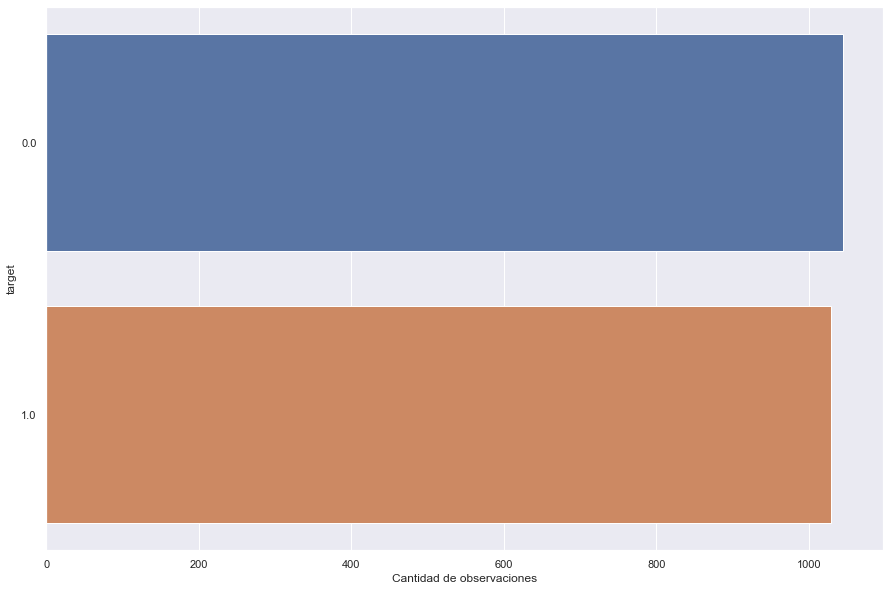

In [652]:
print(df_norm['target']. value_counts ())

plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y="target",data=df_norm)

plt.xlabel('Cantidad de observaciones') 

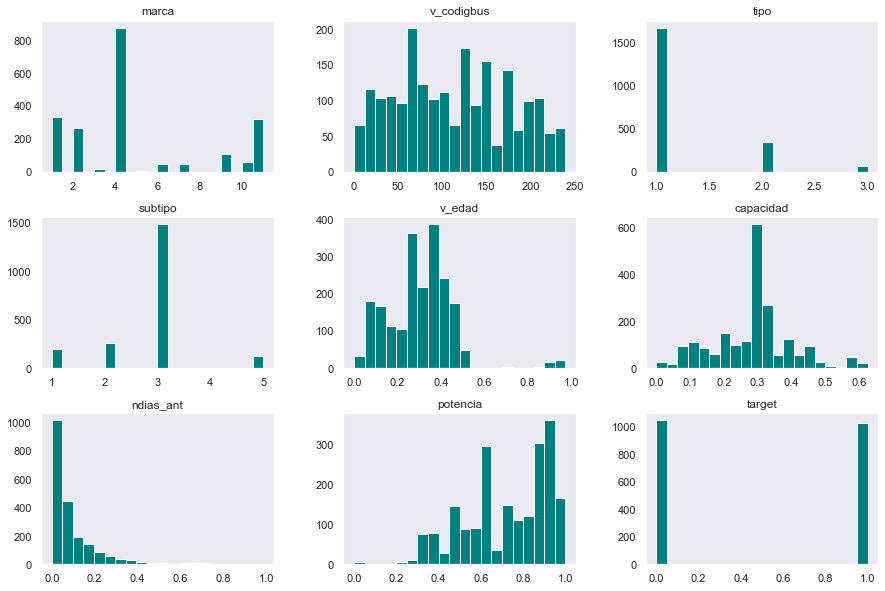

In [653]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

comprobacion de que ndias_ant tienbe valores que tienen sentido

In [654]:
df.ndias_ant.describe()

count    6256.000000
mean       15.956362
std        20.256110
min         1.000000
25%         4.000000
50%         9.000000
75%        20.000000
max       149.000000
Name: ndias_ant, dtype: float64

In [655]:
df.describe()

,v_edad,capacidad,ndias_ant,potencia,target
count,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000
mean,11.123082,51.120524,15.956362,257.635870,0.164482
std,5.812927,19.300962,20.256110,74.159153,0.370742
min,0.000000,8.000000,1.000000,0.000000,0.000000
25%,7.000000,39.000000,4.000000,200.000000,0.000000
50%,12.000000,54.000000,9.000000,279.000000,0.000000
75%,14.000000,59.000000,20.000000,320.000000,0.000000
max,38.000000,163.000000,149.000000,360.000000,1.000000


#df[df['nomopera'].str.contains("Caja")].groupby(['nomopera']).count()
indexNames = df[ (df['ndias_ant'] > 150)
                & (df['ndias_ant'] <= 0) ].index
df.drop(indexNames , inplace=True)

df[df['ndias_ant']>150].hist(bins=20,figsize=(15,10),grid=False, color='teal')

<AxesSubplot:xlabel='repetitividad', ylabel='Nº de días'>

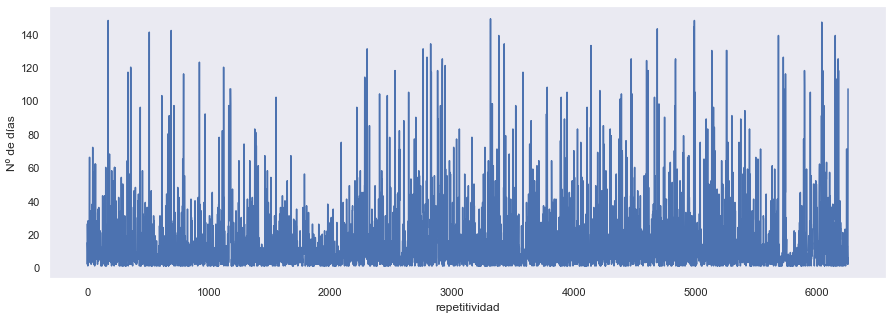

In [656]:
plt.figure(figsize=(15,5))
plt.xlabel('repetitividad')
#plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Nº de días')
df.ndias_ant.plot()

### Analisis de missings y correlaciones

In [657]:
fs1 = FeatureSelector(data = df_norm, labels = df_enc.columns)
fs1.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



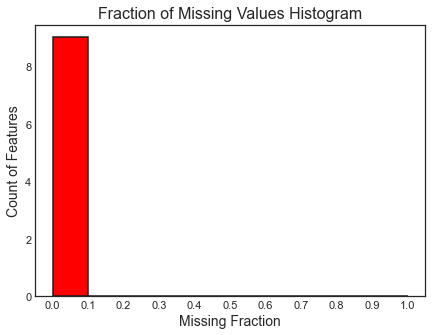

In [658]:
fs1.plot_missing()

In [659]:
round(df.isna().sum() * 100 / len(df),2)

grupopera     0.0
marca         0.0
v_codigbus    0.0
tipo          0.0
v_edad        0.0
capacidad     0.0
ndias_ant     0.0
subtipo       0.0
potencia      0.0
target        0.0
dtype: float64

se comprueban las correlaciones y que variablkes de deberian eliminar

In [660]:
fs1.identify_collinear(correlation_threshold=0.8)

1 features with a correlation magnitude greater than 0.80.



In [661]:
collinear_features = fs1.ops['collinear']
collinear=fs1.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,capacidad,v_codigbus,0.954337


se obserban las correlaciones

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'marca'),
  Text(0, 1.5, 'v_codigbus'),
  Text(0, 2.5, 'tipo'),
  Text(0, 3.5, 'subtipo'),
  Text(0, 4.5, 'v_edad'),
  Text(0, 5.5, 'capacidad'),
  Text(0, 6.5, 'ndias_ant'),
  Text(0, 7.5, 'potencia'),
  Text(0, 8.5, 'target')])

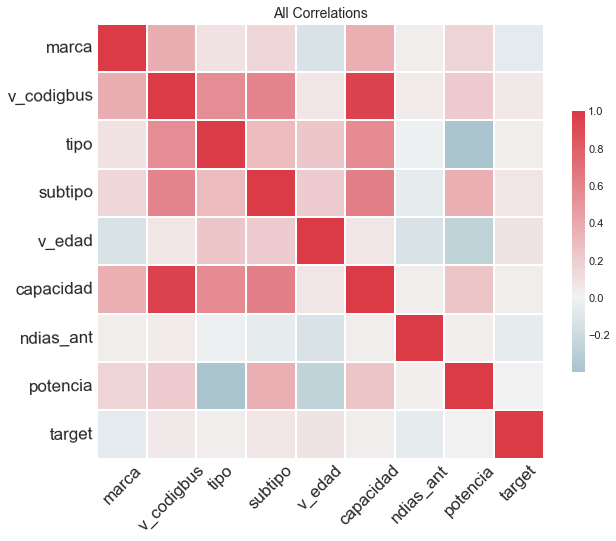

In [662]:
fs1.plot_collinear(plot_all=True)
plt.xticks(rotation=45)
plt.yticks(rotation=1)

<AxesSubplot:>

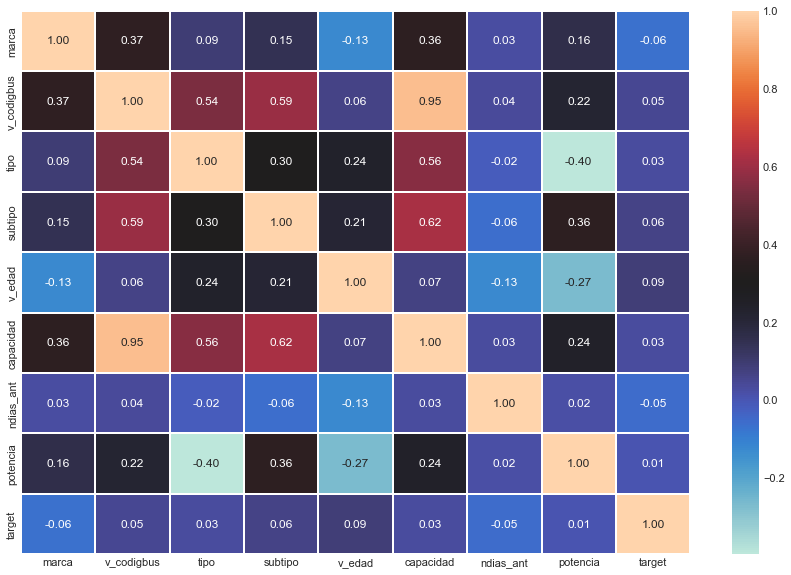

In [663]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Análisis de componentes principales

In [664]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3143545238.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feat=df_feat.drop('target', 0)


In [665]:
df_feat.index

Index(['marca', 'v_codigbus', 'tipo', 'subtipo', 'v_edad', 'capacidad',
       'ndias_ant', 'potencia'],
      dtype='object')

In [666]:
names =  df_feat.index
names

Index(['marca', 'v_codigbus', 'tipo', 'subtipo', 'v_edad', 'capacidad',
       'ndias_ant', 'potencia'],
      dtype='object')

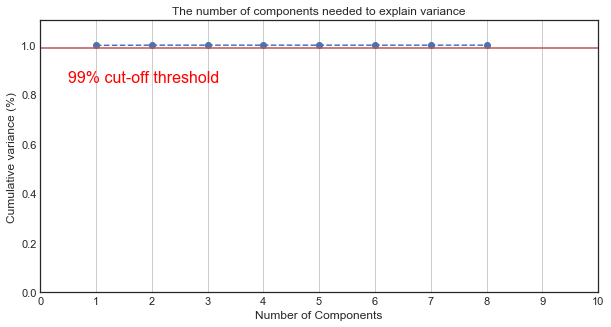

In [540]:

from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.98041446 0.01672647]


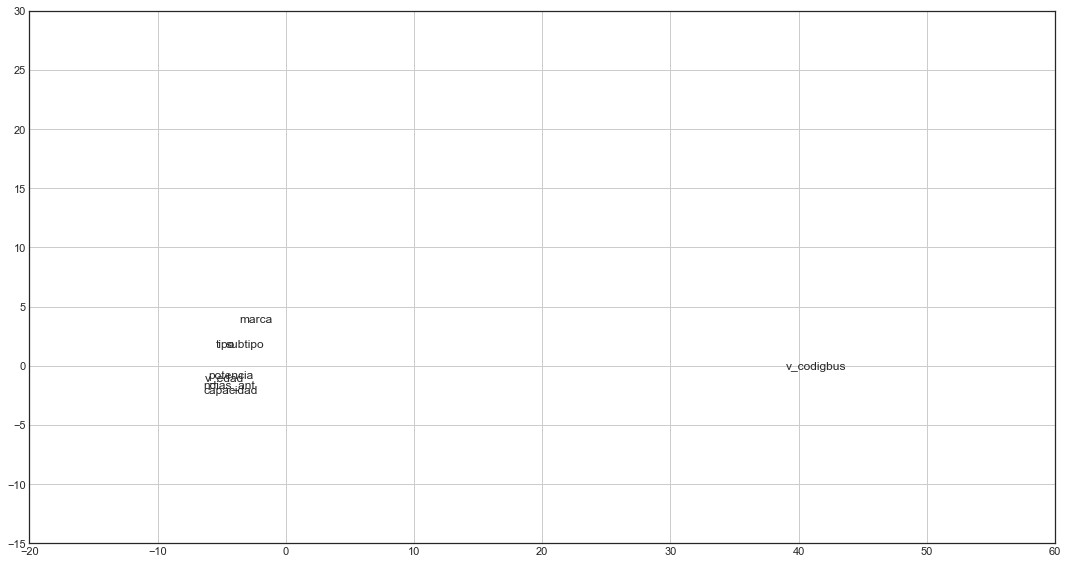

In [541]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-15, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

en este caso la primera variable explica el 98% de los resultados

# Clustering jerárquico

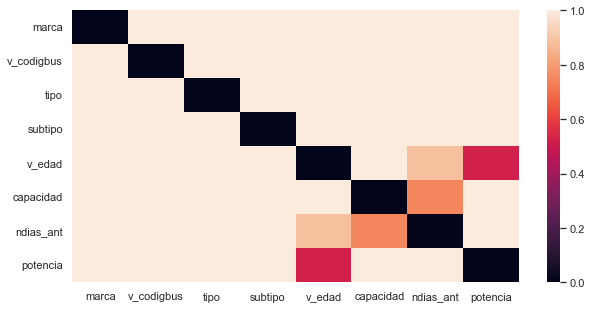

In [542]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/2443087864.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


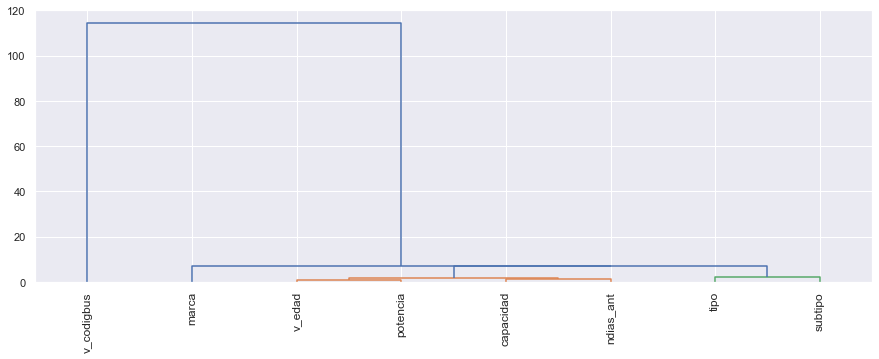

In [543]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 5, labels = names , leaf_rotation=90)
plt.show()

In [544]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# clusters = cluster.hierarchy.linkage(matdist, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# plt.figure(figsize=(15,5))
# cluster.hierarchy.dendrogram(clusters, color_threshold = 20, labels = names , leaf_rotation=90)
# plt.show()

In [545]:
cut = 5 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([3, 4, 2, 2, 1, 1, 1, 1], dtype=int32)

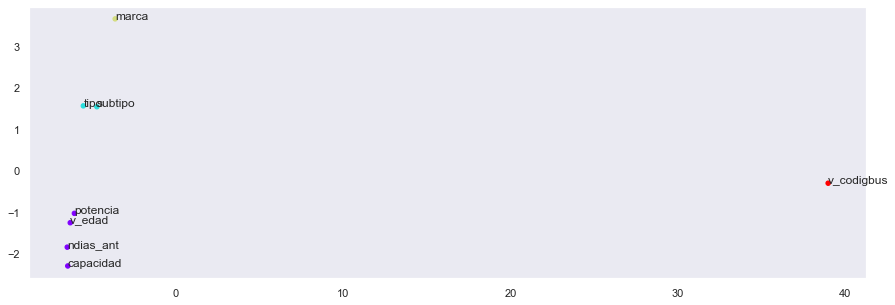

In [546]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.grid()
plt.show()

### PCA para reducción de varibales

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3639015696.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pca = PCA().fit(df_norm.drop('target', 1))


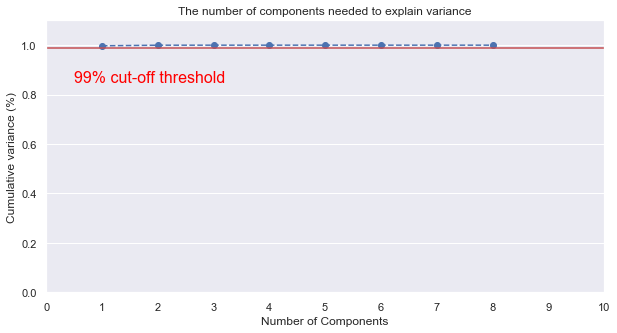

In [547]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_norm.drop('target', 1))


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [548]:
names=df_norm['target']

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3381277651.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))


Variance Ratio:  [0.44085145 0.23183086 0.15325048 0.06688322 0.0390008  0.03838546
 0.02479164]


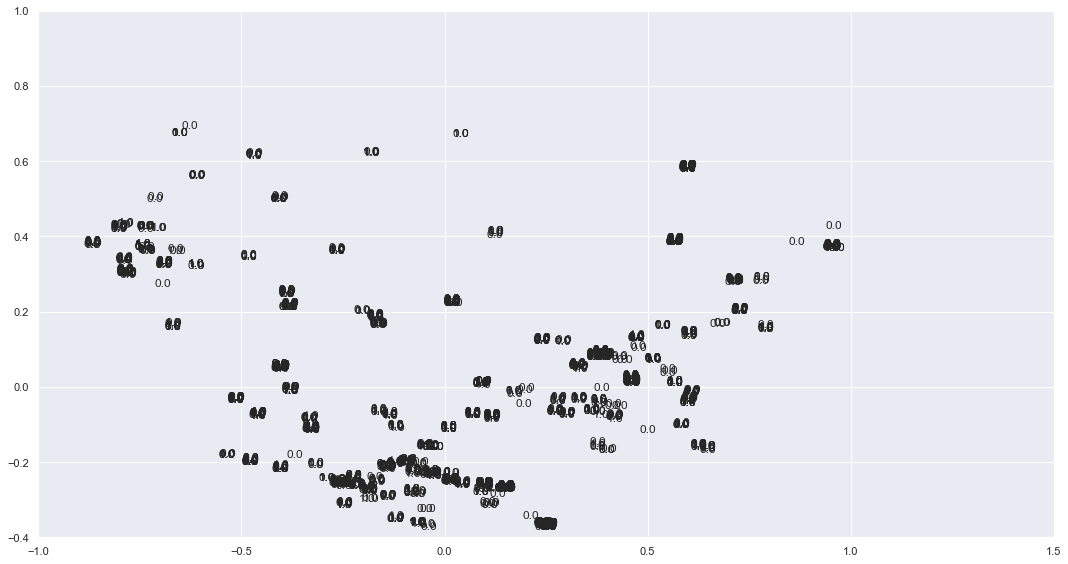

In [549]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 7)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][2], names[i]) 


plt.xlim(-1, 1.5)
plt.ylim(-0.4, 1)
ax.grid(True)
fig.tight_layout()
plt.show()

In [550]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)
minPts=10

# DBSCAN

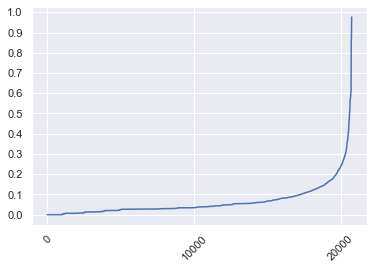

In [551]:


from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50000, 10000))
ax.set_yticks(np.arange(0, 1.5, 0.1))

plt.plot(seq)
plt.xticks(rotation=45)

plt.show()

In [552]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.05, 0.8, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.05, 41, 899
  0.06, 43, 750
  0.07, 47, 598
  0.08, 45, 552
  0.09, 46, 462
  0.10, 46, 385
  0.11, 43, 332
  0.12, 40, 268
  0.13, 37, 230
  0.14, 37, 196
  0.15, 33, 174
  0.16, 31, 159
  0.17, 29, 139
  0.18, 29, 110
  0.19, 25, 100
  0.20, 25, 96
  0.21, 23, 94
  0.22, 22, 78
  0.23, 21, 71
  0.24, 21, 61
  0.25, 21, 56
  0.26, 20, 51
  0.27, 20, 47
  0.28, 18, 42
  0.29, 16, 41
  0.30, 14, 38
  0.31, 14, 35
  0.32, 14, 30
  0.33, 14, 26
  0.34, 14, 25
  0.35, 13, 25
  0.36, 12, 23
  0.37, 12, 22
  0.38, 11, 20
  0.39, 11, 20
  0.40, 11, 20
  0.41, 11, 20
  0.42, 11, 19
  0.43, 10, 19
  0.44, 10, 19
  0.45, 10, 19
  0.46, 8, 19
  0.47, 8, 19
  0.48, 8, 19
  0.49, 8, 19
  0.50, 8, 17
  0.51, 3, 16
  0.52, 2, 16
  0.53, 2, 16
  0.54, 2, 16
  0.55, 2, 16
  0.56, 2, 16
  0.57, 1, 9
  0.58, 1, 8
  0.59, 1, 8
  0.60, 1, 5
  0.61, 1, 5
  0.62, 1, 5
  0.63, 1, 5
  0.64, 1, 5
  0.65, 1, 5
  0.66, 1, 5
  0.67, 1, 5
  0.68, 1, 5
  0.69, 1, 5
  0.70, 1, 5
  0.71, 1, 5
  0.72, 1, 5
  0.73, 

In [553]:
db = DBSCAN(eps=0.52, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [554]:
labels[labels==2] = 4
labels[labels==1] = 3
labels[labels==0] = 2
labels[labels==-1] = 1



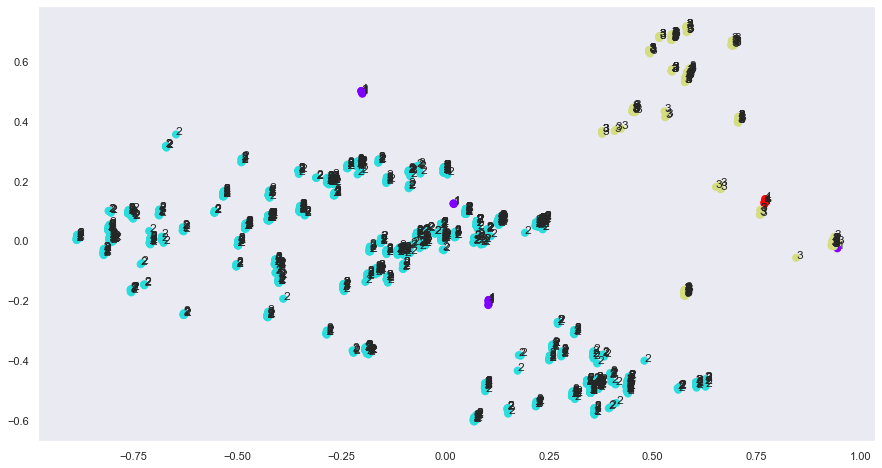

In [555]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], labels[i]) 
plt.grid()
plt.show()

generamos una variable nueva por si aportará algo de informacióna  al hora de predecir, ya que d eforma visual no se puede ver clusters claros

In [556]:
df_norm['DBSCAN_cluster']= labels

# KMEANS

C:\Users\Dani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


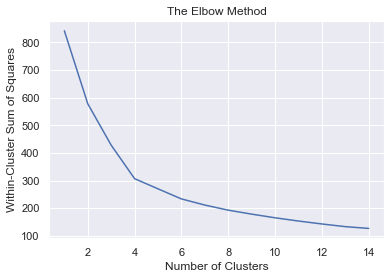

In [557]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(features_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [558]:
clusterer = KMeans(n_clusters=4, random_state=123)
cluster_labels = clusterer.fit_predict(features_norm)
print(cluster_labels)

[0 0 0 ... 0 3 1]


For n_clusters = 2 The average silhouette_score is : 0.30170975698604074
For n_clusters = 3 The average silhouette_score is : 0.3929016656893904
For n_clusters = 4 The average silhouette_score is : 0.3802498710149852
For n_clusters = 5 The average silhouette_score is : 0.33519225574061656
For n_clusters = 6 The average silhouette_score is : 0.37118105483433783


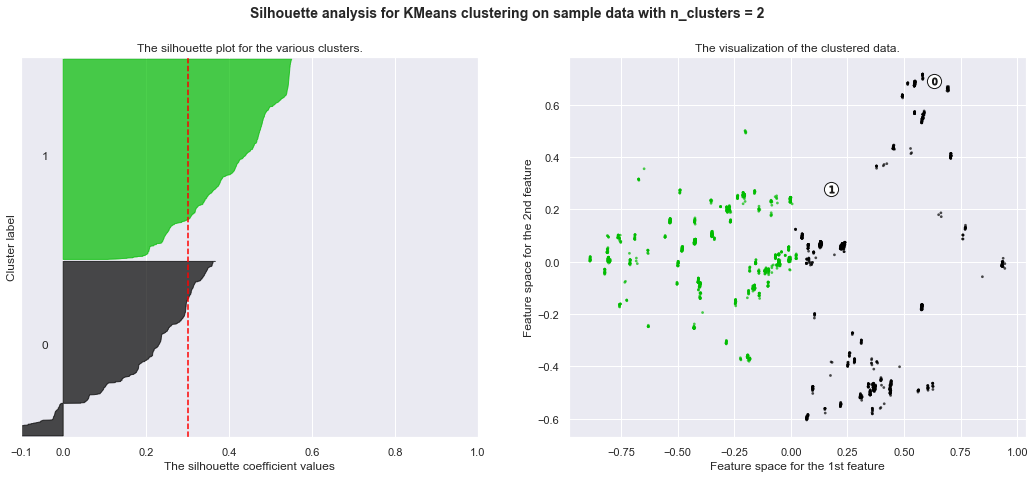

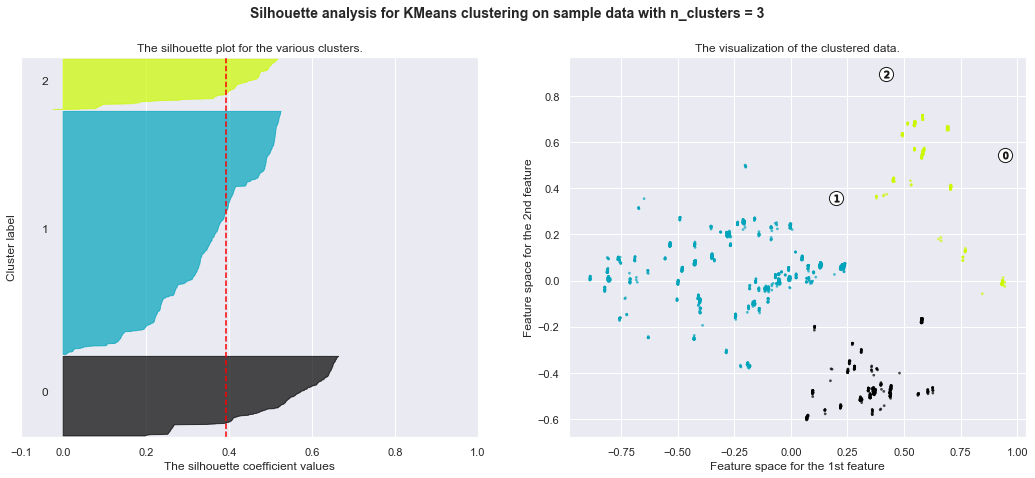

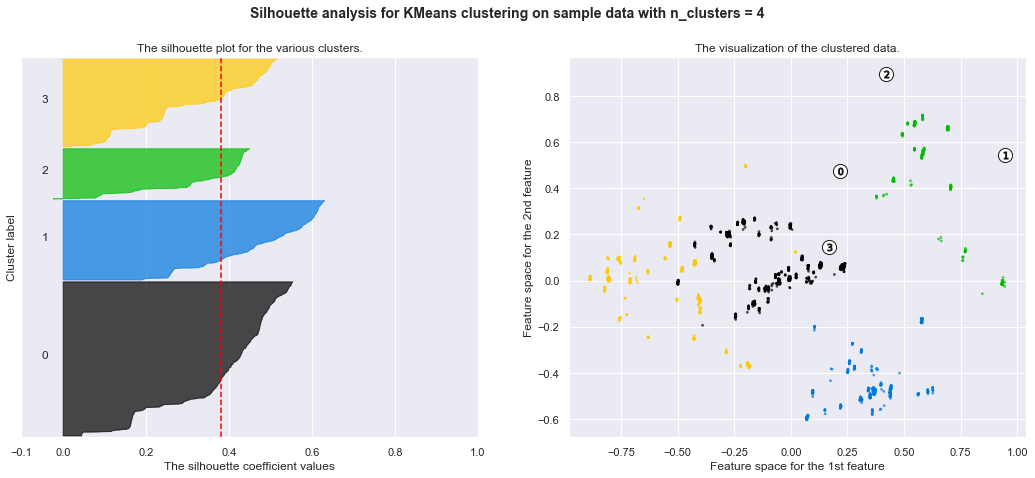

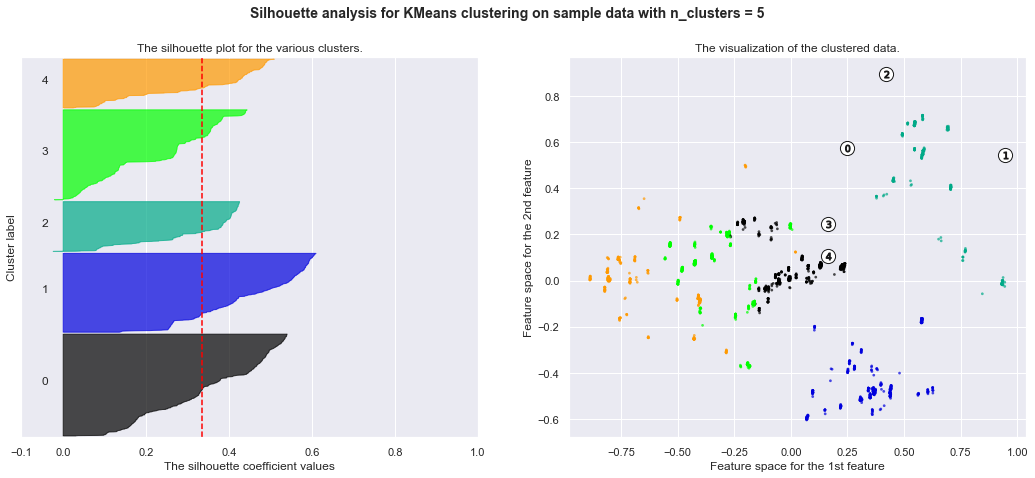

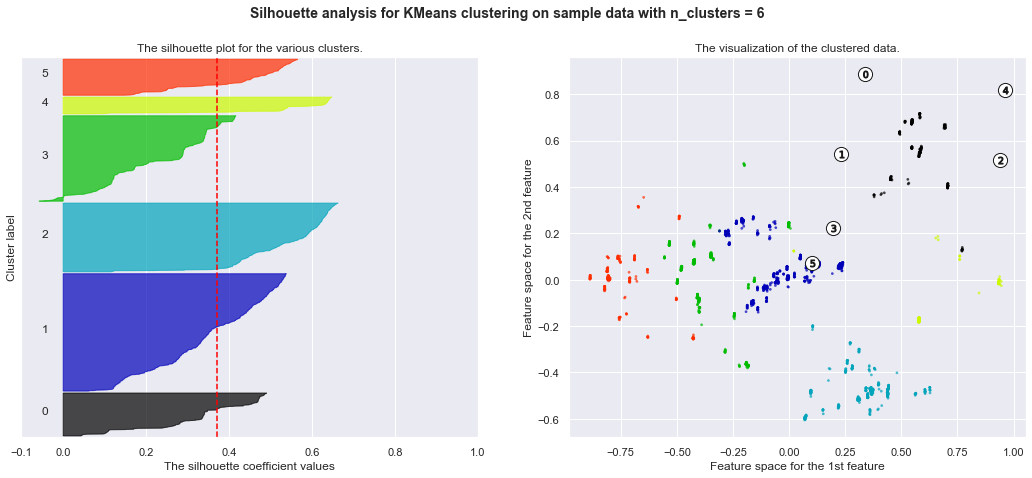

In [559]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

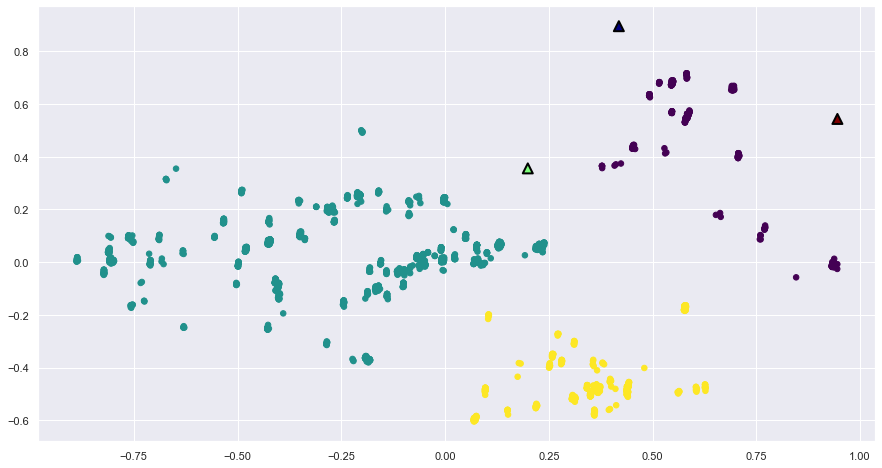

In [560]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1,2],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")



claterizamos en este caso 3 clusters que separaremos apra analizarlos de forma indemendiente

In [561]:
df_norm['Kmeans_cluster']= labels

Comprobamos correlaciones con los cluster par aver si tiene alguna relaciñon con alguna variable

<AxesSubplot:>

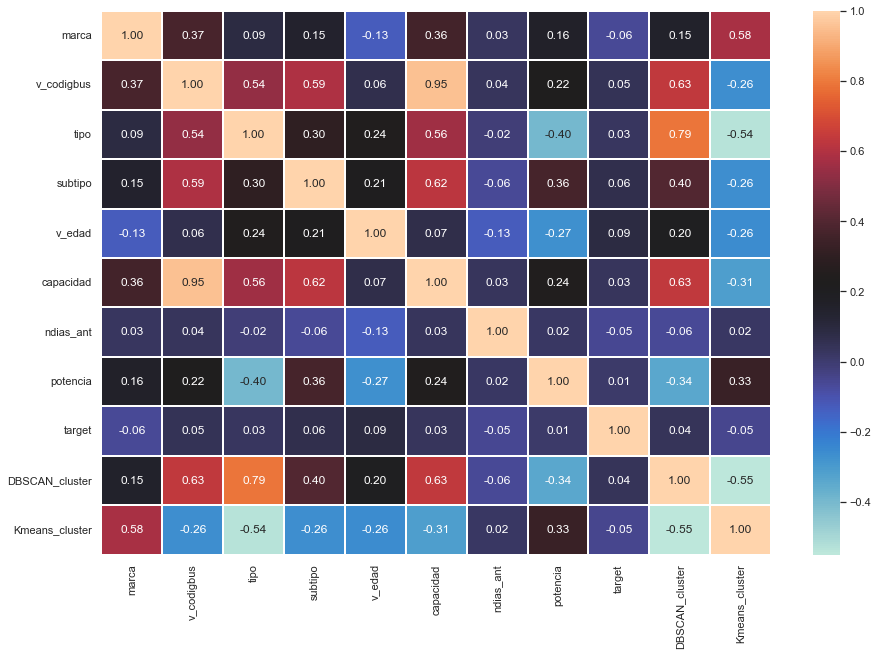

In [562]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

In [563]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/3143545238.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feat=df_feat.drop('target', 0)


In [564]:
names =  df_feat.index
names

Index(['marca', 'v_codigbus', 'tipo', 'subtipo', 'v_edad', 'capacidad',
       'ndias_ant', 'potencia', 'DBSCAN_cluster', 'Kmeans_cluster'],
      dtype='object')

PCA para vaer comos e distribullen en funcion de su varianza los atributos incluyendo los cluster.

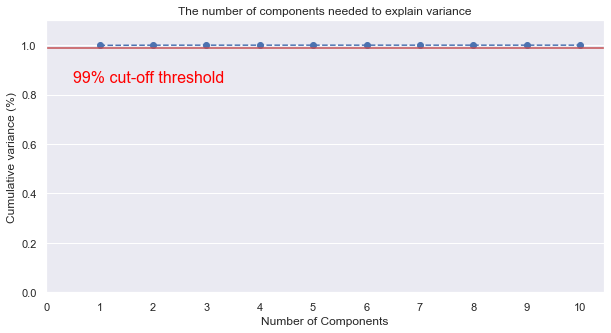

In [565]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.97979374 0.01714827]


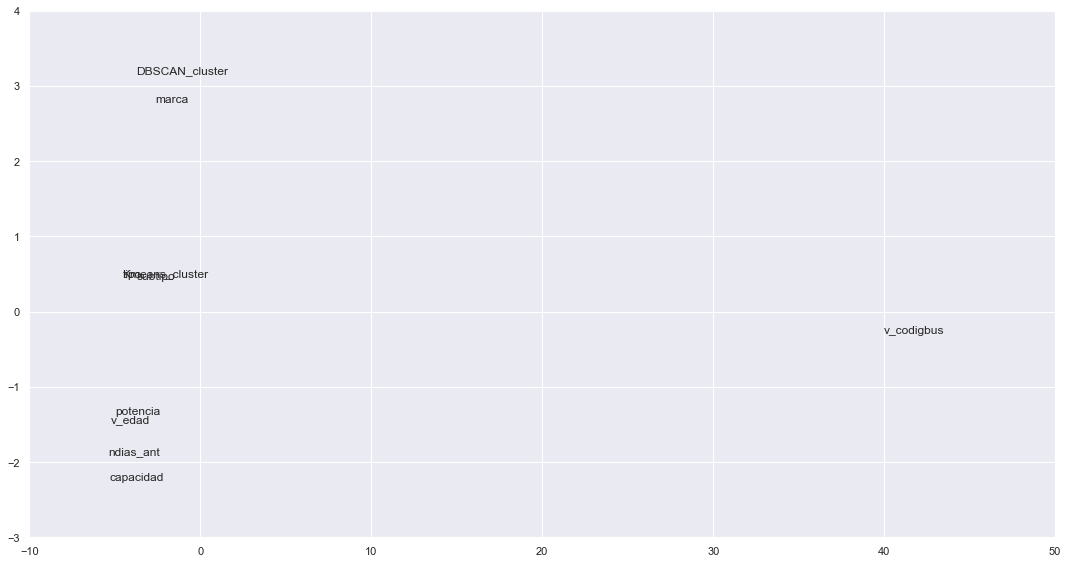

In [566]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-10, 50)
plt.ylim(-3, 4)
ax.grid(True)
fig.tight_layout()
plt.show()

In [567]:
df_norm

,marca,v_codigbus,tipo,subtipo,v_edad,capacidad,ndias_ant,potencia,target,DBSCAN_cluster,Kmeans_cluster
0,1,1,1,1,0.210526,0.000000,0.094595,0.333333,1.0,2,1
1,1,1,1,1,0.263158,0.000000,0.439189,0.333333,1.0,2,1
2,1,1,1,1,0.289474,0.000000,0.054054,0.333333,1.0,2,1
3,2,2,1,1,0.368421,0.006452,0.229730,0.338889,1.0,2,1
4,2,2,1,1,0.368421,0.006452,0.168919,0.338889,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2069,6,239,2,3,0.500000,0.625806,0.020270,0.544444,0.0,3,0
2070,4,151,1,3,0.447368,0.329032,0.006757,0.930556,0.0,2,1
2071,7,58,1,2,0.000000,0.200000,0.054054,0.647222,0.0,2,1
2072,4,136,1,3,0.368421,0.303226,0.074324,0.938889,0.0,2,1


In [568]:
df_norm.columns

Index(['marca', 'v_codigbus', 'tipo', 'subtipo', 'v_edad', 'capacidad',
       'ndias_ant', 'potencia', 'target', 'DBSCAN_cluster', 'Kmeans_cluster'],
      dtype='object')

test=df_n.to_numpy()
test

Seleccion de caracteristicas

In [569]:
#features=['target', 'modelo', 'v_codigbus', 'v_edad']
#features=['target', 'modelo', 'v_codigbus', 'v_edad', 'capacidad','marca','DBSCAN_cluster']
features=['marca', 'v_codigbus', 'tipo', 'subtipo', 'v_edad', 'capacidad','ndias_ant', 'potencia', 'target', 'DBSCAN_cluster', 'Kmeans_cluster']
            
new_df=df_norm[features]


In [570]:
 new_df[features] =  new_df[features].astype('int')

In [571]:
new_df

,marca,v_codigbus,tipo,subtipo,v_edad,capacidad,ndias_ant,potencia,target,DBSCAN_cluster,Kmeans_cluster
0,1,1,1,1,0,0,0,0,1,2,1
1,1,1,1,1,0,0,0,0,1,2,1
2,1,1,1,1,0,0,0,0,1,2,1
3,2,2,1,1,0,0,0,0,1,2,1
4,2,2,1,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2069,6,239,2,3,0,0,0,0,0,3,0
2070,4,151,1,3,0,0,0,0,0,2,1
2071,7,58,1,2,0,0,0,0,0,2,1
2072,4,136,1,3,0,0,0,0,0,2,1


Separamos el dataset en  en cluster par apoder allicar un modelo a cada uno en función de que variables aporten mas información

In [572]:
df_km0 =  new_df[ new_df['Kmeans_cluster'] == 0]
df_km1 =  new_df[ new_df['Kmeans_cluster'] == 1]
df_km2 =  new_df[ new_df['Kmeans_cluster'] == 2]
df_km0=df_km0.reset_index()
df_km1=df_km1.reset_index()
df_km2=df_km2.reset_index()

selección de variables para cada cluster, cambian al ver los resultados

In [573]:
features0=['marca', 'v_codigbus', 'tipo', 'subtipo','target']
df_km0=df_km0[features0]
features1=['marca', 'v_codigbus', 'tipo', 'subtipo', 'DBSCAN_cluster','target']
df_km1=df_km1[features1]
features2=['marca', 'v_codigbus', 'tipo', 'subtipo', 'potencia','DBSCAN_cluster','target']
df_km2=df_km2[features2]

In [574]:
print(df_km0.shape)
print(df_km1.shape)
print(df_km2.shape)

(280, 5)
(1351, 6)
(443, 7)


 Calculo para ponderar importancia de las variables en función al tamaño del dataset

In [575]:


km0=df_km0.shape[0]
km1=df_km1.shape[0]
km2=df_km2.shape[0]
t=km0+km1+km2
p0= round((km0/t),2)
p1= round((km1/t),2)
p2= round((km2/t),2)
p0+p1+p2



1.0

# SPLIT TRAIN MODEL

### Validación cruzada

from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False) # 

### Split dataset

In [576]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(
                                        df_km0.drop(columns = "target"),
                                        #new_df,
                                        df_km0['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [577]:
X_train1,X_test1, y_train1, y_test1 = train_test_split(
                                        df_km1.drop(columns = "target"),
                                        #new_df,
                                        df_km1['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [578]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(
                                        df_km2.drop(columns = "target"),
                                        #new_df,
                                        df_km2['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

train=X_train_c
train.reset_index(drop = True, inplace = True)
round((train.isnull().sum()/len(train))*100,2)


# ************************   MODELADO    ********************


# RANDOM FOREST CLASSIFIER
## RandomizedSearch

In [579]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer,accuracy_score

In [580]:
iteraciones=10

In [581]:
'''
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
            }

parameters_ran={'bootstrap': [True],
               'criterion':['gini'],
               'max_depth': np.arange(90,150,10),
               'max_features': ['auto'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split': np.arange(3,11,2),
               'max_features':['auto'],
               'class_weight':['balanced_subsample'],
               'n_estimators': np.arange(35,100,5)
   '''         

parameters_ran={'bootstrap': [True, False],
               'criterion':['entropy'],
               'max_depth': np.arange(100,200,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced_subsample'],
               'n_estimators':np.arange(50,100,1)
            }
'''
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(10,200,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(10,200,5)
            }
 '''

"\nparameters_ran={'bootstrap': [True, False],\n               'criterion':['gini', 'entropy'],\n               'max_depth': np.arange(10,200,1),\n               'max_features': ['auto', 'sqrt'],\n               'min_samples_leaf': np.arange(2,5,1),\n               'min_samples_split':  np.arange(3,11,1),\n               'max_features':['auto', 'sqrt', 'log2'],\n               'class_weight':['balanced', 'balanced_subsample'],\n               'n_estimators':np.arange(10,200,5)\n            }\n "

In [582]:
RF=RandomForestClassifier(random_state=0)
ran_rf0=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf0.fit(X_train0,y_train0)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134,...
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': 

In [583]:
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))
print("CV score=%0.3f" % ran_rf0.best_score_)
cv_results = ran_rf0.cv_results_

Best parameters from Randomsearch: {'n_estimators': 52, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 132, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}
CV score=0.576


In [584]:
RF=RandomForestClassifier(random_state=0)
ran_rf1=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf1.fit(X_train1,y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134,...
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': 

In [585]:
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))
print("CV score=%0.3f" % ran_rf1.best_score_)
cv_results = ran_rf1.cv_results_

Best parameters from Randomsearch: {'n_estimators': 92, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
CV score=0.588


In [586]:
RF=RandomForestClassifier(random_state=0)
ran_rf2=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf2.fit(X_train2,y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134,...
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': 

In [587]:
print("Best parameters from Randomsearch: {}".format(ran_rf2.best_params_))
print("CV score=%0.3f" % ran_rf2.best_score_)
cv_results = ran_rf2.cv_results_

Best parameters from Randomsearch: {'n_estimators': 92, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
CV score=0.545


SISTEMA REFRIGERACIÓN
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 52, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 132, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}

TRAIN Cluster 0 
CV score=0.5762


PREDICCIÓN Cluster0 


Accuracy prediction:  0.5285714285714286
f1-core :0.5286

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        34
           1       0.54      0.56      0.55        36

    accuracy                           0.53        70
   macro avg       0.53      0.53      0.53        70
weighted avg       0.53      0.53      0.53        70



Importancia Cluster 0:
        feature  importancia
0       marca     0.139419
1  v_codigbus     0.712190
2        tipo     0.039431
3     subtipo     0.108960




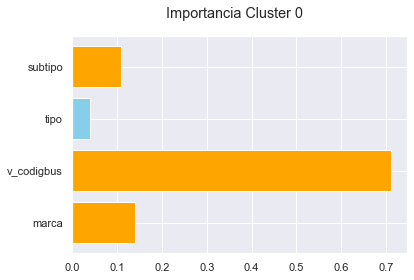

In [588]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))

print('\nTRAIN Cluster 0 ')
print("CV score=%0.4f" % ran_rf0.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp0=ran_rf0.best_params_
RF_ran0 = RandomForestClassifier(random_state=0,bootstrap= rbp0['bootstrap'],
                               class_weight=rbp0['class_weight'],
                               criterion=rbp0['criterion'],
                               max_depth=rbp0['max_depth'],
                               max_features=rbp0['max_features'],
                               min_samples_leaf=rbp0['min_samples_leaf'],
                               min_samples_split=rbp0['min_samples_split'],
                               n_estimators=rbp0['n_estimators'])

#Predicción
RF_ran0.fit(X_train0,y_train0)
y_pred0 = RF_ran0.predict(X_test0)
acc = accuracy_score(y_test0, y_pred0)
print ('PREDICCIÓN Cluster0 \n\n')
print ('Accuracy prediction: ', acc)
cr0=classification_report(y_test0, y_pred0, output_dict=True)
print('f1-core :%0.4f' %cr0['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test0, y_pred0))
print('\n')
importancia0=pd.DataFrame({ 'feature': X_test0.columns,'importancia': RF_ran0.feature_importances_})

print('Importancia Cluster 0:\n ',importancia0)
print('\n')
plt.suptitle('Importancia Cluster 0')
x=X_test0.columns
y=RF_ran0.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output0 = pd.DataFrame({ 'date': X_test0.index,'Real': y_test0, 'Predicho': y_pred0})

SISTEMA REFRIGERACIÓN
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 92, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}

TRAIN Cluster 1 
CV score=0.5883


PREDICCIÓN Cluster 1 


Accuracy prediction:  0.5562130177514792
f1-core :0.5562

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.55      0.46      0.50       164
           1       0.56      0.64      0.60       174

    accuracy                           0.56       338
   macro avg       0.56      0.55      0.55       338
weighted avg       0.56      0.56      0.55       338



Importancia Cluster 1:
           features  importancia
0           marca     0.062650
1      v_codigbus     0.883207
2            tipo     0.005710
3         subtipo     0.046868
4  DBSCAN_cluster     0.001566




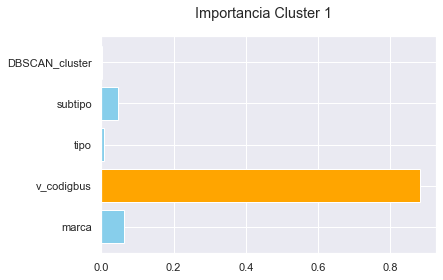

In [589]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))

print('\nTRAIN Cluster 1 ')
print("CV score=%0.4f" % ran_rf1.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp1=ran_rf1.best_params_
RF_ran1 = RandomForestClassifier(random_state=0,bootstrap= rbp1['bootstrap'],
                               class_weight=rbp1['class_weight'],
                               criterion=rbp1['criterion'],
                               max_depth=rbp1['max_depth'],
                               max_features=rbp1['max_features'],
                               min_samples_leaf=rbp1['min_samples_leaf'],
                               min_samples_split=rbp1['min_samples_split'],
                               n_estimators=rbp1['n_estimators'])

#Predicción
RF_ran1.fit(X_train1,y_train1)
y_pred1 = RF_ran1.predict(X_test1)
acc = accuracy_score(y_test1, y_pred1)
print ('PREDICCIÓN Cluster 1 \n\n')
print ('Accuracy prediction: ', acc)
cr1=classification_report(y_test1, y_pred1, output_dict=True)
print('f1-core :%0.4f' %cr1['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test1, y_pred1))
print('\n')
importancia1=pd.DataFrame({ 'features': X_test1.columns,'importancia': RF_ran1.feature_importances_})

print('Importancia Cluster 1:\n ',importancia1)
print('\n')
plt.suptitle('Importancia Cluster 1')

x=X_test1.columns
y=RF_ran1.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
output1 = pd.DataFrame({ 'date': X_test1.index,'Real': y_test1, 'Predicho': y_pred1})

SISTEMA REFRIGERACIÓN
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 92, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}

TRAIN Cluster 2 
CV score=0.5452


PREDICCIÓN Cluster0 


Accuracy prediction:  0.5675675675675675
f1-core :0.5676

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.61      0.53      0.56        59
           1       0.53      0.62      0.57        52

    accuracy                           0.57       111
   macro avg       0.57      0.57      0.57       111
weighted avg       0.57      0.57      0.57       111



Importancia Cluster 2:
            feature  importancia
0           marca     0.041873
1      v_codigbus     0.751116
2            tipo     0.076507
3         subtipo     0.052612
4        potencia     0.031612
5  DBSCAN_cluster     0.046279




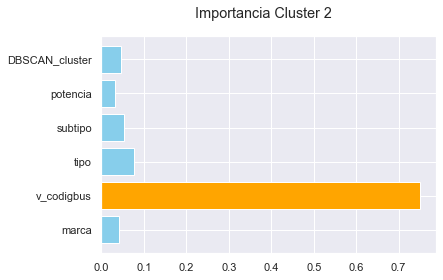

In [590]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf2.best_params_))

print('\nTRAIN Cluster 2 ')
print("CV score=%0.4f" % ran_rf2.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp2=ran_rf2.best_params_
RF_ran2 = RandomForestClassifier(random_state=0,bootstrap= rbp2['bootstrap'],
                               class_weight=rbp2['class_weight'],
                               criterion=rbp2['criterion'],
                               max_depth=rbp2['max_depth'],
                               max_features=rbp2['max_features'],
                               min_samples_leaf=rbp2['min_samples_leaf'],
                               min_samples_split=rbp2['min_samples_split'],
                               n_estimators=rbp2['n_estimators'])

#Predicción
RF_ran2.fit(X_train2,y_train2)
y_pred2 = RF_ran2.predict(X_test2)
acc = accuracy_score(y_test2, y_pred2)
print ('PREDICCIÓN Cluster0 \n\n')
print ('Accuracy prediction: ', acc)
cr2=classification_report(y_test2, y_pred2, output_dict=True)
print('f1-core :%0.4f' %cr2['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test2, y_pred2))
print('\n')
importancia2=pd.DataFrame({ 'feature': X_test2.columns,'importancia': RF_ran2.feature_importances_})

print('Importancia Cluster 2:\n ',importancia2)
print('\n')
plt.suptitle('Importancia Cluster 2')
x=X_test2.columns
y=RF_ran2.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster2.png')
output2 = pd.DataFrame({ 'date': X_test2.index,'Real': y_test2, 'Predicho': y_pred2})

### Combinación de resultandos ponderando en función dle tamaño del dataset

In [591]:
importance0=RF_ran0.feature_importances_
importance1=RF_ran1.feature_importances_
importance2=RF_ran2.feature_importances_
#importance=((importance0+importance1)/2)


In [592]:
output= pd.concat([output0, output1, output2], ignore_index=True)


In [593]:
important0= pd.DataFrame({ 'feature': X_test0.columns,'importancia': importance0,'vp':p0, 'imp_pond':importance0*p0,'cluster':0})
important1= pd.DataFrame({ 'feature': X_test1.columns,'importancia': importance1,'vp':p1,'imp_pond':importance1*p1,'cluster':1})
important2= pd.DataFrame({ 'feature': X_test2.columns,'importancia': importance2,'vp':p2,'imp_pond':importance2*p2,'cluster':1})

In [594]:
important = pd.concat([important0,important1,important2], axis=0)
important

,feature,importancia,vp,imp_pond,cluster
0,marca,0.139419,0.14,0.019519,0
1,v_codigbus,0.712190,0.14,0.099707,0
2,tipo,0.039431,0.14,0.005520,0
3,subtipo,0.108960,0.14,0.015254,0
0,marca,0.062650,0.65,0.040722,1
1,v_codigbus,0.883207,0.65,0.574084,1
2,tipo,0.005710,0.65,0.003711,1
3,subtipo,0.046868,0.65,0.030464,1
4,DBSCAN_cluster,0.001566,0.65,0.001018,1
0,marca,0.041873,0.21,0.008793,1


In [595]:
imp=important.groupby('feature')['imp_pond'].sum()
imp

feature
DBSCAN_cluster    0.010737
marca             0.069034
potencia          0.006638
subtipo           0.056767
tipo              0.025298
v_codigbus        0.831525
Name: imp_pond, dtype: float64

PREDICCIÓN Combinada


Accuracy prediction:  0.5549132947976878
f1-core :0.5549

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.56      0.48      0.52       257
           1       0.55      0.63      0.59       262

    accuracy                           0.55       519
   macro avg       0.56      0.55      0.55       519
weighted avg       0.56      0.55      0.55       519



Importancia:
                        features  importancia
feature                                    
DBSCAN_cluster  DBSCAN_cluster     0.010737
marca                    marca     0.069034
potencia              potencia     0.006638
subtipo                subtipo     0.056767
tipo                      tipo     0.025298
v_codigbus          v_codigbus     0.831525




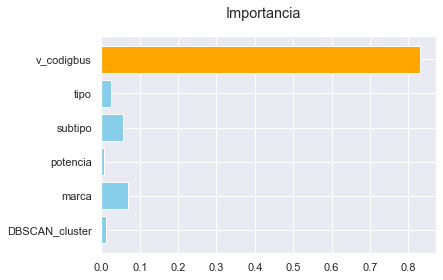

In [596]:
#Predicción combinada

acc = accuracy_score(output['Real'], output['Predicho'])
print ('PREDICCIÓN Combinada\n\n')
print ('Accuracy prediction: ', acc)
crc=classification_report(output['Real'],output['Predicho'], output_dict=True)
print('f1-core :%0.4f' %crc['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(output['Real'],  output['Predicho']))
print('\n')


importancia=pd.DataFrame({ 'features': imp.index,'importancia': imp})

print('Importancia:\n ',importancia)
print('\n')
plt.suptitle('Importancia')
x=imp.index
y=imp
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png')

Permite recibir un mensaje a traves de telegram con el informe de los resultados, y los graficos, en caso de que la busqueda de hipermarametros se hiciese muy larga

In [597]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+
              'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
              'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+
              'Features Cluster 2 :\n'+str(list(X_test2.columns))+'\n\n'+
              'RandomSearch Random Forest: '+'\n\n'+
              'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
              'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
              'Cluster 2 \n'+str(ran_rf2.best_params_)+'\n'+'Best Score Cluster 2 :%0.4f' % ran_rf2.best_score_+'\n\n'+
              'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
              'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
              'f1-score Cluster 2: %0.4f' % cr2['accuracy']+'\n'+
              'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
              '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster2.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/1313552709.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster0.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/1313552709.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster1.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/1313552709.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster2.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',


done


C:\Users\Dani\AppData\Local\Temp/ipykernel_21544/1313552709.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\importancia.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',


Se realizan lo mismo con Gridserach para ser mas exauistivo a la hora de encontrar los mejores hyperparametros, buscando en los alrededores de los mejores parametros obtenido con el ramdom search

## GridSearch

In [196]:

parameters_grid={'bootstrap': [True],
               'criterion':['entropy'],
               'max_depth': np.arange(100,200,1),
               'max_features':['log2'],
               'min_samples_leaf': np.arange(2,3,1),
               'min_samples_split':  np.arange(5,11,1),
               'class_weight':['balanced_subsample'],
               'n_estimators':np.arange(50,100,1)
            }
'''
parameters_grid={'bootstrap': [True],
               'criterion':['entropy'],
               'max_depth': np.arange(2,20,1),
               'max_features': ['sqrt'],
               'min_samples_leaf': np.arange(2,4,1),
               'min_samples_split': np.arange(4,8,1),
               'class_weight':['balanced_subsample'],
               'n_estimators': np.arange(100,150,1)
            }
'''

"\nparameters_grid={'bootstrap': [True],\n               'criterion':['entropy'],\n               'max_depth': np.arange(2,20,1),\n               'max_features': ['sqrt'],\n               'min_samples_leaf': np.arange(2,4,1),\n               'min_samples_split': np.arange(4,8,1),\n               'class_weight':['balanced_subsample'],\n               'n_estimators': np.arange(100,150,1)\n            }\n"

Best parameters from Randomsearch: {'n_estimators': 135, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.595

In [197]:
grid_rf = GridSearchCV(RF,parameters_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30000 candidates, totalling 150000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced_subsample'],
                         'criterion': ['entropy'],
                         'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 1...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                         'max_features': ['log2'],
                         'min_samples_leaf': array([2]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,

In [ ]:
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print("CV score=%0.3f" % grid_rf.best_score_)
cv_results = grid_rf.cv_results_

Best parameters from Randomsearch: {'n_estimators': 135, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.595

Best parameters from Randomsearch: {'n_estimators': 45, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.593

SISTEMA REFRIGERACIÓN
GridSearch

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 84}



TRAIN 
CV score=0.589


PREDICCIÓN 


Accuracy prediction:  0.5972420351878269
f1-core :0.5972

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1062
           1       0.59      0.64      0.61      1041

    accuracy                           0.60      2103
   macro avg       0.60      0.60      0.60      2103
weighted avg       0.60      0.60      0.60      2103



Importancia:
        feature  importancia
0      modelo     0.269105
1  v_codigbus     0.403180
2      v_edad     0.327715


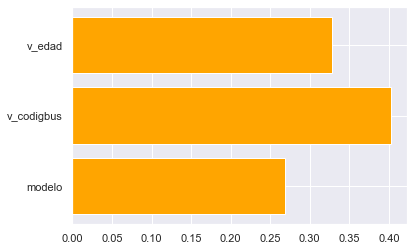

In [198]:
# constructor  GridSearch

print(target.upper()+'\n'+'GridSearch'+'\n')
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print ('\n')
print('\nTRAIN ')
print("CV score=%0.3f" % grid_rf.best_score_)
print ('\n')

from sklearn.inspection import permutation_importance


gbp=grid_rf.best_params_
RF_grid = RandomForestClassifier(random_state=0,bootstrap= gbp['bootstrap'],
                               class_weight=gbp['class_weight'],
                               criterion=gbp['criterion'],
                               max_depth=gbp['max_depth'],
                               max_features=gbp['max_features'],
                               min_samples_leaf=gbp['min_samples_leaf'],
                               min_samples_split=gbp['min_samples_split'],
                               n_estimators=gbp['n_estimators'])


#Predicción
RF_grid.fit(X_train,y_train)
y_pred = RF_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN \n\n')
print ('Accuracy prediction: ', acc)
cr=classification_report(y_test, y_pred, output_dict=True)
print('f1-core :%0.4f' %cr['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia:\n ',importancia)
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)




#Salida
output = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})


C:\Users\Dani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


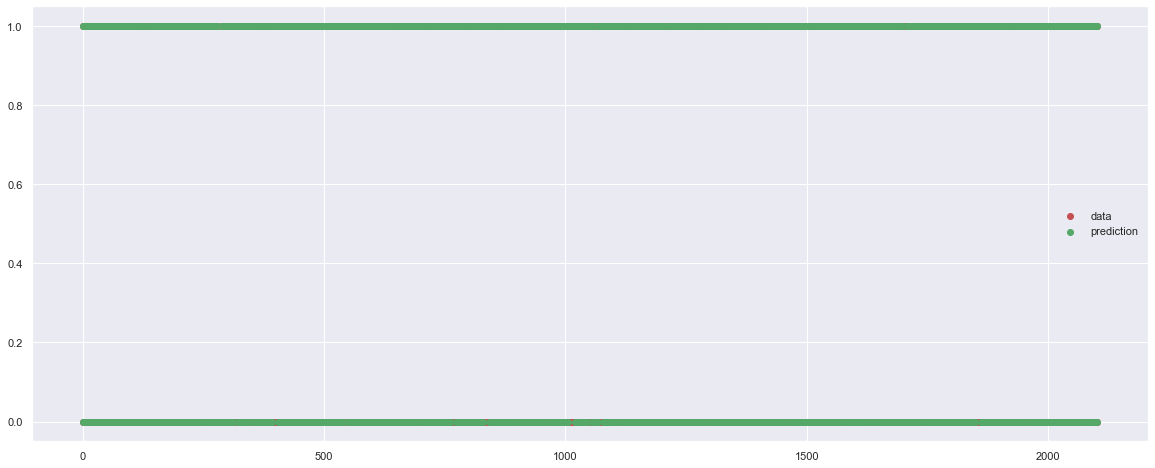

In [219]:
import numpy as np
plt.figure(figsize=(20,8))
xx = np.stack(i for i in range(y_test.shape[0]))
plt.scatter(xx, y_test, c='r', label='data',marker='o')
plt.scatter(xx, y_pred, c='g', label='prediction',marker='o')
plt.axis('tight')
plt.legend()


plt.show()

In [201]:
# NOTIFICACIÓN DE PROCESO TERMINADO GridSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'GridSearch Random Forest: '+'\n'+
              'Features :\n'+str(list(X_test.columns))+'\n\n'+
              str(grid_rf.best_params_)+'\n'+'Best Score :%0.4f' % grid_rf.best_score_+'\n'
              +'f1-score: %0.4f' % cr['accuracy']+'\n'+
              '0 : %0.4f' % cr['0']['f1-score']+'\n'+
              '1 : %0.4f' % cr['1']['f1-score'])

#enviarDocumento(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


SISTEMA REFRIGERACIÓN
GridSearch

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 84}



TRAIN 
CV score=0.5885


PREDICCIÓN 


Accuracy prediction:  0.6005706134094151
f1-core :0.6006

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1062
           1       0.59      0.64      0.61      1041

    accuracy                           0.60      2103
   macro avg       0.60      0.60      0.60      2103
weighted avg       0.60      0.60      0.60      2103



Importancia:
        feature  importancia
0      modelo     0.269105
1  v_codigbus     0.403180
2      v_edad     0.327715


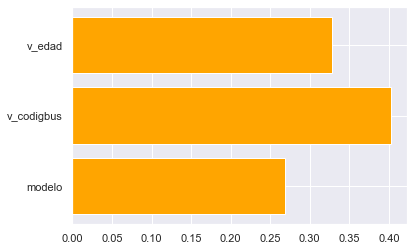

In [206]:
# Constructor
# constructor  GridSearch

print(target.upper()+'\n'+'GridSearch'+'\n')
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print ('\n')
print('\nTRAIN ')
print("CV score=%0.4f" % grid_rf.best_score_)
print ('\n')

from sklearn.inspection import permutation_importance


gbp=grid_rf.best_params_
RF_grid = RandomForestClassifier(random_state=0,bootstrap= True,
                               class_weight='balanced_subsample',
                               criterion='entropy',
                               max_depth=66,
                               max_features='log2',
                               min_samples_leaf=4,
                               min_samples_split=9,
                               n_estimators=34)


#Predicción
RF_grid.fit(X_train,y_train)
y_pred = RF_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN \n\n')
print ('Accuracy prediction: ', acc)
cr=classification_report(y_test, y_pred, output_dict=True)
print('f1-core :%0.4f' %cr['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia:\n ',importancia)
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)




#Salida
output = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})



# SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC # "Support vector classifier"
from scipy import stats


svc = SVC(probability = True, random_state = 0)
svc

'''
parameters_ran_svc={'C': np.arange(0.1, 2, 0.2),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.1, 1, 0.2),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }

parameters_ran_svc={'C': np.arange(0.6, 1, 0.02),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 1, 0.02),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }
'''                   
parameters_ran_svc={'C': np.arange(0.68, 0.8, 0.01),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 0.7, 0.01),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['balanced']
                   }

In [123]:
ran_svc=RandomizedSearchCV(svc,parameters_ran_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0) 
ran_svc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79]),
                                        'class_weight': ['balanced'],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': array([0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69])},
                   random_state=0, scoring='accuracy', verbose=1)

print("Best parameters from Randomsearch: {}".format(ran_svc.best_params_))
print("CV score=%0.3f" % ran_svc.best_score_)
cv_results = ran_svc.cv_results_

parameters_grid_svc={'C': np.arange(0.75, 0.9, 0.01),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 0.7, 0.01),
                    'decision_function_shape':['ovo'],
                    'class_weight': ['balanced']
                   }


grid_svc = GridSearchCV(svc,parameters_grid_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_svc.fit(X_train,y_train)

Best parameters from Randomsearch: {'gamma': 0.67, 'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'C': 0.7900000000000001}
CV score=0.595

print("Best parameters from gridsearch: {}".format(grid_svc.best_params_))
print("CV score=%0.3f" % grid_svc.best_score_)
cv_results = grid_svc.cv_results_

# constructor
test=X_test
svc = SVC(probability = True, random_state = 0,
          C=0.85 ,
          gamma= 0.69,
          decision_function_shape='ovo',
          class_weight='balanced')

#Predicción
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Accuracy: ', acc)

#Salida
output_svr = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})

print('DECISION TREE CLASSIFIER \n')
print(classification_report(y_test, y_pred))

sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
sound.play()